In [1]:
import numpy as np
from nnAudio import Spectrogram
from librosa.core import note_to_hz
from librosa.feature import melspectrogram
import torch
import sys
# sys.path.insert(0, './Installation/nnAudio')
# import Spectrogram
device = 'cuda:0'

In [2]:
import matplotlib.pyplot as plt

# Creating artificial input signal

In [3]:
fs = 22050
s = np.linspace(0,10,fs*10)
x = np.sin(2*np.pi*50*s, dtype=np.float32) + np.sin(2*np.pi*100*s, dtype=np.float32) \
    + np.sin(2*np.pi*200*s, dtype=np.float32) + np.sin(2*np.pi*400*s, dtype=np.float32) \
    + np.sin(2*np.pi*800*s, dtype=np.float32) + np.sin(2*np.pi*1600*s, dtype=np.float32) \
    + np.sin(2*np.pi*3200*s, dtype=np.float32) + np.sin(2*np.pi*6400*s, dtype=np.float32) 

In [4]:
x_torch = torch.tensor(x).to(device)

# nnAudio

In [5]:
power_list = [1,2,3,4,5,6,7,8,9]

In [10]:
for power in power_list:
    mel_spectrogram = Spectrogram.MelSpectrogram(verbose=False, power=power)
    melspec_torch = mel_spectrogram(x_torch)
    result = np.allclose(melspec_torch.cpu().numpy(), melspectrogram(x, power=power), 1e-2, 1e-2)    
    
    print(result)

True
True
True
True
True
True
True
True
True


In [7]:
mel_spectrogram = Spectrogram.MelSpectrogram(power=5)

STFT filter created, time used = 0.0029 seconds
Mel filter created, time used = 0.0030 seconds


In [14]:
melspec_torch = mel_spectrogram(x_torch)

In [15]:
np.allclose(melspec_torch.cpu().numpy(), melspectrogram(x, power=5), 1e-4, 1e-4)

False

In [17]:
melspec_torch

tensor([[[1.0996e+12, 2.9433e+11, 1.1299e+11,  ..., 1.1516e+11,
          1.3393e+11, 4.6788e+11],
         [7.5649e+11, 7.3346e+11, 1.0630e+12,  ..., 1.0447e+12,
          9.8579e+11, 6.8819e+11],
         [1.3573e+11, 1.5853e+11, 3.3728e+11,  ..., 3.3009e+11,
          3.1884e+11, 1.0327e+11],
         ...,
         [6.0273e+00, 1.8835e-01, 1.9697e-14,  ..., 1.4055e-07,
          1.9414e-05, 1.6953e+00],
         [5.5571e+00, 1.7366e-01, 6.2757e-16,  ..., 1.4037e-06,
          2.1998e-05, 1.5908e+00],
         [5.2839e+00, 1.6512e-01, 1.1672e-16,  ..., 3.2510e-03,
          2.9751e-03, 1.5808e+00]]], device='cuda:0')

In [18]:
melspectrogram(x, power=5)

array([[1.09959184e+12, 2.94334923e+11, 1.12989118e+11, ...,
        1.15161874e+11, 1.33928083e+11, 4.67877593e+11],
       [7.56493451e+11, 7.33466067e+11, 1.06298075e+12, ...,
        1.04470597e+12, 9.85789956e+11, 6.88193077e+11],
       [1.35733395e+11, 1.58533911e+11, 3.37283416e+11, ...,
        3.30091823e+11, 3.18836048e+11, 1.03268352e+11],
       ...,
       [6.02733660e+00, 1.88352823e-01, 1.96864873e-14, ...,
        1.40550867e-07, 1.94136628e-05, 1.69530332e+00],
       [5.55711555e+00, 1.73658073e-01, 6.27533412e-16, ...,
        1.40367695e-06, 2.19983740e-05, 1.59079611e+00],
       [5.28392029e+00, 1.65120810e-01, 1.16578415e-16, ...,
        3.25099076e-03, 2.97517725e-03, 1.58076525e+00]], dtype=float32)

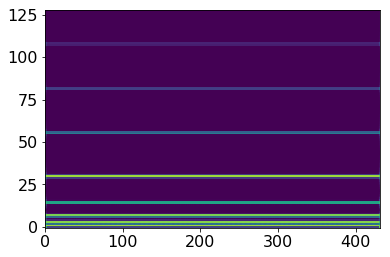

In [20]:
plt.imshow(melspec_torch[0].cpu().numpy(), aspect='auto', origin='lower')
plt.tick_params(labelsize=16)

# Librosa Implmentation

In [21]:
from librosa.feature import melspectrogram

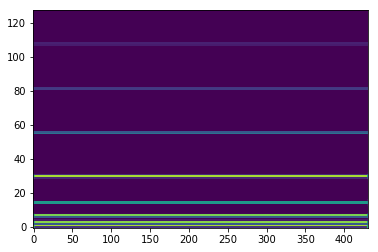

In [22]:
plt.imshow(melspectrogram(x), aspect='auto', origin='lower')

## Comparing nnAudio and Librosa output

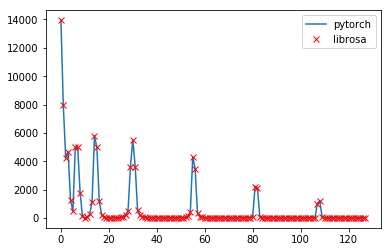

In [9]:
plt.plot(melspec_torch[0].numpy()[:,0])
plt.plot(melspectrogram(x)[:,0], 'rx')
plt.legend(['pytorch', 'librosa'])

In [10]:
np.allclose(melspec_torch[0].numpy()[:,0], melspectrogram(x)[:,0])

True